In [1]:
# import dependencies

import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st
import warnings
warnings.filterwarnings('ignore')

#importing our cancer dataset into a Pandas DataFrame
cancer_data_df = pd.read_csv("Resources/cancer_data.csv")
                      

# Review the DataFrame
cancer_data_df                      

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.30010,0.14710,...,17.33,184.60,2019.0,0.16220,0.66560,0.7119,0.2654,0.4601,0.11890,NaN
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.08690,0.07017,...,23.41,158.80,1956.0,0.12380,0.18660,0.2416,0.1860,0.2750,0.08902,NaN
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.19740,0.12790,...,25.53,152.50,1709.0,0.14440,0.42450,0.4504,0.2430,0.3613,0.08758,NaN
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.24140,0.10520,...,26.50,98.87,567.7,0.20980,0.86630,0.6869,0.2575,0.6638,0.17300,NaN
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.19800,0.10430,...,16.67,152.20,1575.0,0.13740,0.20500,0.4000,0.1625,0.2364,0.07678,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
564,926424,M,21.56,22.39,142.00,1479.0,0.11100,0.11590,0.24390,0.13890,...,26.40,166.10,2027.0,0.14100,0.21130,0.4107,0.2216,0.2060,0.07115,NaN
565,926682,M,20.13,28.25,131.20,1261.0,0.09780,0.10340,0.14400,0.09791,...,38.25,155.00,1731.0,0.11660,0.19220,0.3215,0.1628,0.2572,0.06637,NaN
566,926954,M,16.60,28.08,108.30,858.1,0.08455,0.10230,0.09251,0.05302,...,34.12,126.70,1124.0,0.11390,0.30940,0.3403,0.1418,0.2218,0.07820,NaN
567,927241,M,20.60,29.33,140.10,1265.0,0.11780,0.27700,0.35140,0.15200,...,39.42,184.60,1821.0,0.16500,0.86810,0.9387,0.2650,0.4087,0.12400,NaN


In [2]:
# Remove leading/trailing whitespaces from column names and convert to lowercase
cancer_data_df.columns = cancer_data_df.columns.str.strip().str.lower()

# Drop the 'id' and 'unnamed: 32' columns as they are not needed for modeling
cancer_data_df = cancer_data_df.drop(['id', 'unnamed: 32'], axis=1)

# Print the data types of each column
cancer_data_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 31 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   diagnosis                569 non-null    object 
 1   radius_mean              569 non-null    float64
 2   texture_mean             569 non-null    float64
 3   perimeter_mean           569 non-null    float64
 4   area_mean                569 non-null    float64
 5   smoothness_mean          569 non-null    float64
 6   compactness_mean         569 non-null    float64
 7   concavity_mean           569 non-null    float64
 8   concave points_mean      569 non-null    float64
 9   symmetry_mean            569 non-null    float64
 10  fractal_dimension_mean   569 non-null    float64
 11  radius_se                569 non-null    float64
 12  texture_se               569 non-null    float64
 13  perimeter_se             569 non-null    float64
 14  area_se                  5

In [3]:
# Check for missing values in the dataset
missing_values = cancer_data_df.isnull().sum()
print("Missing Values:\n", missing_values)

Missing Values:
 diagnosis                  0
radius_mean                0
texture_mean               0
perimeter_mean             0
area_mean                  0
smoothness_mean            0
compactness_mean           0
concavity_mean             0
concave points_mean        0
symmetry_mean              0
fractal_dimension_mean     0
radius_se                  0
texture_se                 0
perimeter_se               0
area_se                    0
smoothness_se              0
compactness_se             0
concavity_se               0
concave points_se          0
symmetry_se                0
fractal_dimension_se       0
radius_worst               0
texture_worst              0
perimeter_worst            0
area_worst                 0
smoothness_worst           0
compactness_worst          0
concavity_worst            0
concave points_worst       0
symmetry_worst             0
fractal_dimension_worst    0
dtype: int64


In [4]:
cancer_data_df.describe()

,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
count,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,...,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000
mean,14.127292,19.289649,91.969033,654.889104,0.096360,0.104341,0.088799,0.048919,0.181162,0.062798,...,16.269190,25.677223,107.261213,880.583128,0.132369,0.254265,0.272188,0.114606,0.290076,0.083946
std,3.524049,4.301036,24.298981,351.914129,0.014064,0.052813,0.079720,0.038803,0.027414,0.007060,...,4.833242,6.146258,33.602542,569.356993,0.022832,0.157336,0.208624,0.065732,0.061867,0.018061
min,6.981000,9.710000,43.790000,143.500000,0.052630,0.019380,0.000000,0.000000,0.106000,0.049960,...,7.930000,12.020000,50.410000,185.200000,0.071170,0.027290,0.000000,0.000000,0.156500,0.055040
25%,11.700000,16.170000,75.170000,420.300000,0.086370,0.064920,0.029560,0.020310,0.161900,0.057700,...,13.010000,21.080000,84.110000,515.300000,0.116600,0.147200,0.114500,0.064930,0.250400,0.071460
50%,13.370000,18.840000,86.240000,551.100000,0.095870,0.092630,0.061540,0.033500,0.179200,0.061540,...,14.970000,25.410000,97.660000,686.500000,0.131300,0.211900,0.226700,0.099930,0.282200,0.080040
75%,15.780000,21.800000,104.100000,782.700000,0.105300,0.130400,0.130700,0.074000,0.195700,0.066120,...,18.790000,29.720000,125.400000,1084.000000,0.146000,0.339100,0.382900,0.161400,0.317900,0.092080
max,28.110000,39.280000,188.500000,2501.000000,0.163400,0.345400,0.426800,0.201200,0.304000,0.097440,...,36.040000,49.540000,251.200000,4254.000000,0.222600,1.058000,1.252000,0.291000,0.663800,0.207500


In [5]:
# Separate the target variable (diagnosis) from the features
y = cancer_data_df['diagnosis']
X = cancer_data_df.drop('diagnosis', axis=1)

# Preview the features data
X.head()

,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


In [6]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
# import libraries
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

# Split the dataset into training and testing sets (80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [7]:
# Create a StandardScaler instances
scaler = StandardScaler()
# Fit the StandardScaler
X_scaler = scaler.fit(X_train)

# Scale the data
X_train_scaled = X_scaler.transform(X_train)
X_test_scaled = X_scaler.transform(X_test)

# Standardize features by scaling 
cancer_data_scaled = StandardScaler()
X_train_cancerscaled = cancer_data_scaled.fit_transform(X_train)
X_test_cancerscaled = cancer_data_scaled.transform(X_test)

# Create DataFrames for scaled data
X_train_cancerscaled_df = pd.DataFrame(X_train_cancerscaled, columns=X_train.columns)
X_test_cancerscaled_df = pd.DataFrame(X_test_cancerscaled, columns=X_test.columns)

X_train_cancerscaled_df.head()
X_test_cancerscaled_df.head()

,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,-0.466497,-0.137289,-0.444211,-0.486465,0.280850,0.041606,-0.111465,-0.264869,0.415241,0.135137,...,-0.263235,-0.147842,-0.331548,-0.351093,0.480019,-0.096496,-0.035830,-0.194351,0.172757,0.203730
1,1.365363,0.498665,1.305511,1.341471,-0.406539,-0.013724,0.240637,0.821449,-0.833981,-1.131215,...,1.794619,0.172372,1.763661,1.744141,-0.530514,-0.123620,-0.028181,0.991779,-0.561211,-1.008389
2,0.380066,0.069220,0.404101,0.266596,0.967520,0.356414,0.726902,0.857221,0.437094,-0.666053,...,0.629403,0.076638,0.533832,0.492044,1.000466,-0.086163,0.499625,0.570350,-0.107831,-0.206293
3,-0.486317,-0.353185,-0.428570,-0.526233,0.694290,0.533852,-0.144722,-0.533686,0.000048,1.147386,...,-0.698111,-0.433394,-0.524721,-0.636959,0.584109,0.065603,-0.163957,-0.620377,-0.553285,0.545322
4,-0.729810,-1.113514,-0.709283,-0.709281,0.294512,0.159898,-0.271202,-0.587608,0.025542,0.703052,...,-0.827117,-0.966535,-0.849575,-0.739243,0.128718,-0.264407,-0.453677,-0.689644,-0.913135,-0.141789


In [8]:
data_df = pd.DataFrame()
 #data_df.append({'Mean': your_mean_val, 'diagnosis': i})
for i in cancer_data_df.columns[2:]:
    #print(cancer_data_df[i].mean(),i)
    data_df =  data_df.append({'Mean':cancer_data_df[i].mean() , 'diagnosis': i}, ignore_index=True)
data_df
#print(data_df)

,Mean,diagnosis
0,19.289649,texture_mean
1,91.969033,perimeter_mean
2,654.889104,area_mean
3,0.096360,smoothness_mean
4,0.104341,compactness_mean
5,0.088799,concavity_mean
6,0.048919,concave points_mean
7,0.181162,symmetry_mean
8,0.062798,fractal_dimension_mean
9,0.405172,radius_se


In [9]:
# Set x axis using average of breast cancer 
average_cancer_data_df = cancer_data_df.mean()

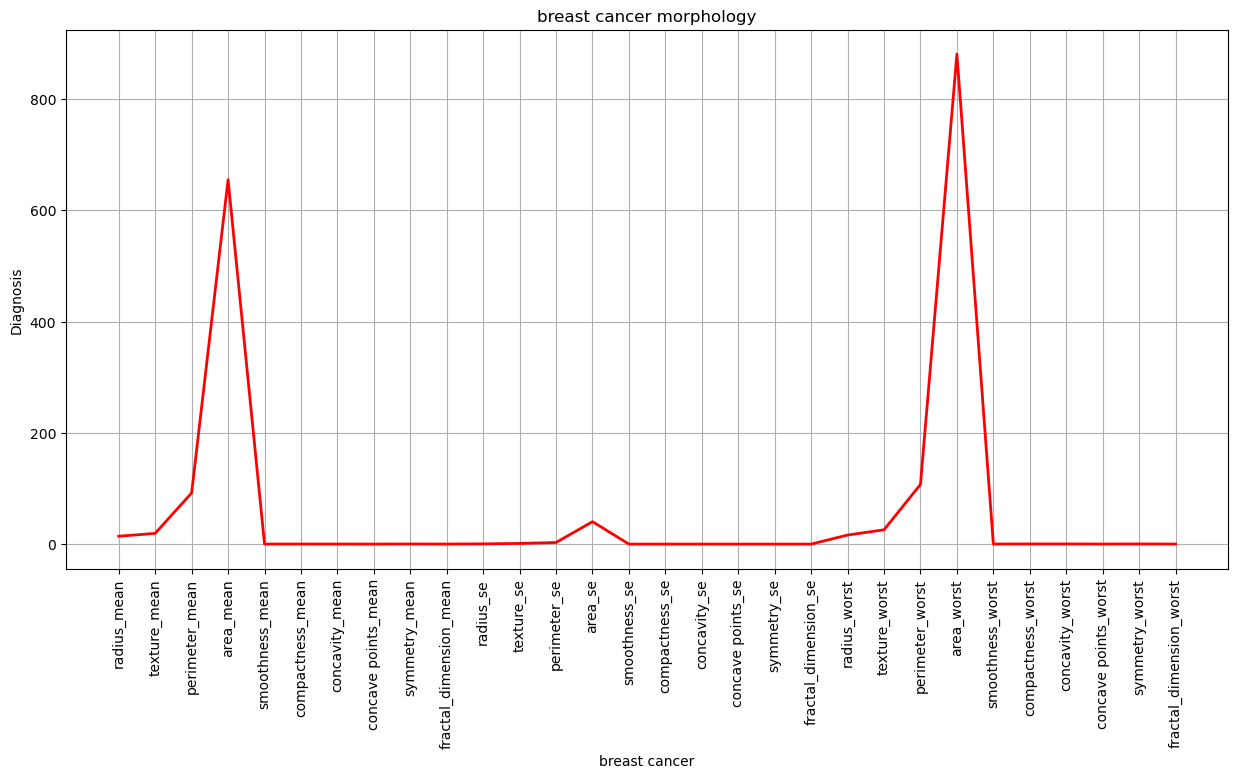

In [10]:
# create a line graph to show the trend in breast cancer across diagnosis

plt.figure(figsize=(15,7))
plt.plot(average_cancer_data_df, color="red",linewidth=2, markersize=12)
plt.title("breast cancer morphology")
plt.xlabel('breast cancer')
plt.ylabel('Diagnosis')
plt.xticks(rotation="vertical")
plt.grid(True)

plt.show()


In [11]:
# Subset the dataframe by malignant and benign diagnosis for the X and Y-axis.
malignant_data = cancer_data_df[cancer_data_df.diagnosis == "M"]
benign_data = cancer_data_df[cancer_data_df.diagnosis == "B"]


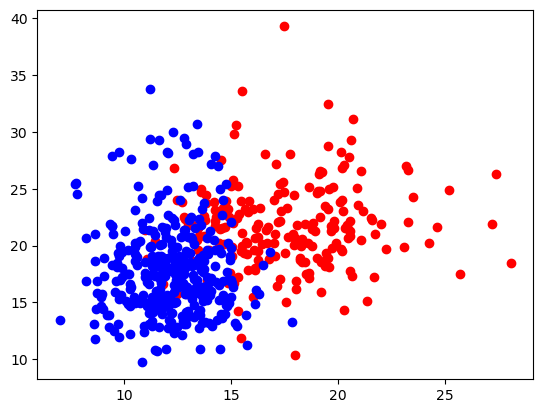

In [12]:
# Visualize using a scatter plot
plt.scatter(malignant_data['radius_mean'], malignant_data['texture_mean'], color='red', label='Malignant')
plt.scatter(benign_data['radius_mean'], benign_data['texture_mean'], color='blue', label='Benign')


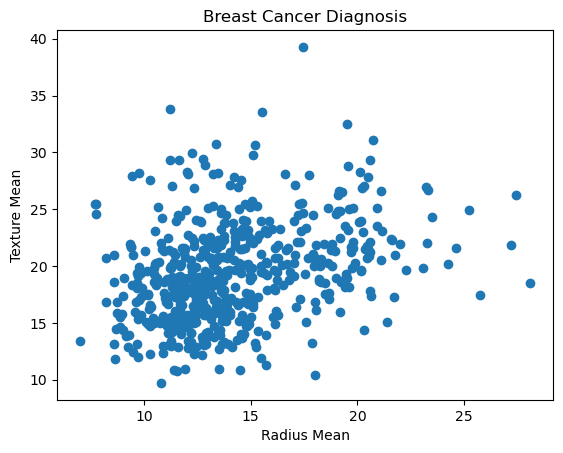

In [13]:
# Extract 'Radius Mean' and 'Texture Mean' columns
radius_mean = cancer_data_df['radius_mean']
texture_mean = cancer_data_df['texture_mean']

# Create scatter plot
plt.scatter(radius_mean, texture_mean)

# Set axis labels and plot title
plt.xlabel('Radius Mean')
plt.ylabel('Texture Mean')
plt.title('Breast Cancer Diagnosis')

# Display plot
plt.show()